# Customer Interaction Analysis

## Project Overview

### Business Scenario  
This project simulates the role of a data analyst supporting a conversational AI product team. The task is to analyze real customer service chat transcripts to identify common patterns, pain points, and language structures that can inform the design and training of AI-powered response systems.

### Use Case  
Real-world customer conversations often include incomplete thoughts, informal language, or repeated requests — all of which can challenge AI models trying to interpret intent. By studying how customers phrase questions and how agents respond, we can uncover critical insights to improve training data, intent classification, and AI response logic.

### Problem Statement  
How can we extract actionable patterns from customer-agent chat transcripts that will help conversational AI systems better understand user intent and respond more effectively?

### Objective  
- Explore and clean real-world customer service chat data  
- Identify frequent questions, phrasing structures, and message patterns  
- Highlight potential training data opportunities for AI intent modeling  
- Recommend improvements to AI system behavior based on real interaction insights


## Dataset Overview

### Source  
[Customer Service Chat Data – Kaggle (30k rows)](https://www.kaggle.com/datasets/aimack/customer-service-chat-data-30k-rows)

### Description  
This dataset contains anonymized chat transcripts between customer service agents and customers. Each row represents a single message within a larger conversation.

### Key Features  
- **Transaction Start/End Date**: Timestamps for when each chat session began and ended  
- **Agent**: Name of the customer service representative  
- **Chat Duration**: Total length of the chat session  
- **Teams**: Assigned support team handling the session (e.g., Mobile Service, Technical)  
- **Session Name**: Unique identifier grouping related messages  
- **Chat Closed By**: Indicates who ended the chat (Customer, Representative, or System)  
- **Interactive Chat**: Boolean flag indicating if the session was interactive  
- **Browser** / **Operating System** / **Geo**: Metadata about the customer's device and location  
- **Response Time (Agent & Visitor)**: Time taken by each party to respond  
- **Customer Wait Time**: Initial wait before agent responded  
- **Customer Rating** and **Comment**: Feedback left by the customer  
- **Transferred Chat**: Flag showing whether the chat was transferred to another rep  
- **Text**: The actual message or query sent by the customer

### Relevance  
Real-world conversational data like this is critical for improving chatbot intent recognition and response accuracy — especially in customer support and AI training workflows.


## Importing Libraries

We’ll import the core libraries needed for data loading, cleaning, and initial exploration.

- `pandas` for structured data analysis  
- `numpy` for numerical operations  
- `matplotlib` and `seaborn` for basic visualizations  
- `re` and `string` for basic text preprocessing  
- `warnings` to suppress unnecessary output


In [41]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings

# Notebook settings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)



## Data Loading and Initial Exploration

We'll load the dataset and begin with a basic overview to understand its structure and contents.

### Key goals for this step:
- Confirm row count and data types  
- Check for missing values  
- Preview message structure and metadata  
- Identify useful columns for analysis


In [9]:
# Load the chat dataset
df = pd.read_excel('../data/customer_interaction_data.xlsx')

print("Dataset loaded successfully with", df.shape[0], "rows and", df.shape[1], "columns.")

# Preview the first few rows
df.head()


Dataset loaded successfully with 31952 rows and 18 columns.


,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time,Text
0,2018-06-08 23:59:00,Zaha,00:18:22,Mobile Service Team,Session:2057187615:23360,Customer,True,Edge 16.16299,Windows-10,Sweden,00:01:02,00:00:43,2018-07-08 00:18:00,,,False,00:00:01,I would really like to know the criteria which...
1,2018-06-08 23:59:00,Berenice,00:03:05,Mobile Technical Team,Session:2057187614:23368,Representative,False,Edge,Windows,Australia,00:00:00,00:00:00,2018-07-08 00:02:00,,,True,00:01:01,NaN
2,2018-06-08 23:59:00,Madi,00:22:33,Mobile Service Team,Session:2057187615:23358,Customer,True,c~67.0.3396.87,Android-4.3,Australia,00:00:32,00:01:28,2018-07-08 00:26:00,,,False,00:00:01,NaN
3,2018-06-08 23:59:00,Rose,00:38:20,Mobile Service Team,Session:2057187616:18361,System,True,Other,11.4.1,NaN,00:00:37,00:01:18,2018-07-08 00:38:00,,,False,00:00:01,Just wondered which airline would give any so...
4,2018-06-08 23:59:00,Sarrah,00:11:50,Fixed Service Team,Session:2057187617:2598,Representative,True,Other,Android 8.1.0,NaN,00:00:21,00:00:38,2018-07-08 00:14:00,,,False,00:00:01,Do they offer lunch or should we eat outside?


In [ ]:
# Checking column info and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31952 entries, 0 to 31951
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Transaction Start Date    31952 non-null  datetime64[ns]
 1   Agent                     31952 non-null  object        
 2   Chat Duration             31952 non-null  object        
 3   Teams                     31952 non-null  object        
 4   Session Name              31952 non-null  object        
 5   Chat Closed By            31741 non-null  object        
 6   Interactive Chat          31952 non-null  bool          
 7   Browser                   31952 non-null  object        
 8   Operating System          31952 non-null  object        
 9   Geo                       17665 non-null  object        
 10  Response Time of Agent    31952 non-null  object        
 11  Response time of Visitor  31952 non-null  object        
 12  Transaction End Da

In [12]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


Geo                         14287
Text                          819
Chat Closed By                211
Transaction Start Date          0
Agent                           0
Teams                           0
Session Name                    0
Interactive Chat                0
Browser                         0
Chat Duration                   0
Operating System                0
Response Time of Agent          0
Transaction End Date            0
Response time of Visitor        0
Customer Rating                 0
Customer Comment                0
Transferred Chat                0
Customer Wait Time              0
dtype: int64

In [17]:
# Check for full row duplicates
df.duplicated().sum()




np.int64(0)

In [18]:
# Or check by a combination of columns
df.duplicated(subset=['Session Name', 'Text']).sum()


np.int64(0)

In [19]:
# Check duplicates based on just the text column
df.duplicated(subset='Text').sum()


np.int64(13763)

### Initial Observations

- Dataset contains **31,952 rows** and **18 columns**
- No missing values in key structural columns (`Agent`, `Session Name`, `Chat Duration`, etc.)
- **Missing values found in**:
  - `Geo` → 14,287 missing (likely due to device/browser privacy or logging issues)
  - `Text` → 819 missing — may indicate system messages or silent sessions
  - `Chat Closed By` → 211 missing — possibly due to system timeouts
- `Text`, `Customer Rating`, and `Customer Comment` are all stored as `object` type (will check further for blanks)
- Roughly **13,700 messages share identical text content**, though none are duplicated within the same session  
- These are likely canned agent responses, repeated queries, or short common phrases  
- We'll retain these messages initially, but deduplicate selectively during frequency-based text analysis

## Data Cleaning & Preprocessing

Before diving into analysis, we’ll clean the dataset to ensure it's ready for NLP and intent evaluation.

### Key steps in this section:
- Drop or flag rows with missing or empty message text  
- Convert time-related columns to usable formats  
- Normalize text for analysis (e.g., lowercase, punctuation removal)  
- Identify and tag repetitive boilerplate responses (optional)

We'll keep the original message structure intact while preparing for insight extraction and modeling.


In [23]:
# Make a copy to preserve original
df_clean = df.copy()

# Drop rows with missing or empty 'Text'
df_clean = df_clean[df_clean['Text'].notnull()]
df_clean = df_clean[df_clean['Text'].astype(str).str.strip() != '']

# Convert time-related columns to total seconds
time_cols = [
    'Chat Duration', 
    'Response Time of Agent', 
    'Response time of Visitor', 
    'Customer Wait Time'
]

for col in time_cols:
    # Convert to string first to avoid datetime.time errors
    df_clean[col] = pd.to_timedelta(df_clean[col].astype(str), errors='coerce').dt.total_seconds()

# Normalize text: force to string, lowercase, remove punctuation
def clean_text(text):
    text = str(text).lower()
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    return text.strip()

df_clean['Clean_Text'] = df_clean['Text'].apply(clean_text)

# Confirm shape after cleaning
print(f"Cleaned dataset shape: {df_clean.shape}")
df_clean[['Text', 'Clean_Text']].sample(5, random_state=2)


Cleaned dataset shape: (31107, 19)


,Text,Clean_Text
17240,What is an originating flight? Flying from LHR...,what is an originating flight flying from lhr ...
8441,cnn.com/2008/â€¦index.html Could they not have...,cnncom2008â€¦indexhtml could they not have phy...
3640,How will i be able to find where to Pick up bu...,how will i be able to find where to pick up bu...
23532,After signing in with my new password I still ...,after signing in with my new password i still ...
27609,I am trying to make a reservation from fresno ...,i am trying to make a reservation from fresno ...


### Cleaning Summary

- Removed **845 rows** with missing or empty text. **31,107 rows** remain for analysis  
- Converted four time-based columns (`Chat Duration`, `Response Time`, `Customer Wait Time`, etc.) to numeric format in seconds  
- Normalized text data:
  - Lowercased all messages  
  - Removed punctuation  
  - Stripped whitespace  
- Created a new column `Clean_Text` to preserve a cleaned version of the message text for NLP and frequency-based analysis


## Exploratory Data Analysis (EDA)

In this section, we’ll explore patterns in message content and session behavior using visual and statistical summaries.

### Key goals for EDA:
- Understand message volume, length, and frequency trends  
- Identify common words and recurring themes in customer chats  
- Examine how session characteristics (duration, wait time, closures) vary across chats  
- Surface potential intent categories or pain points using exploratory text patterns


count    31107.000000
mean       135.834957
std        200.627351
min          1.000000
25%         61.000000
50%         81.000000
75%        132.000000
max       4569.000000
Name: Message_Length, dtype: float64


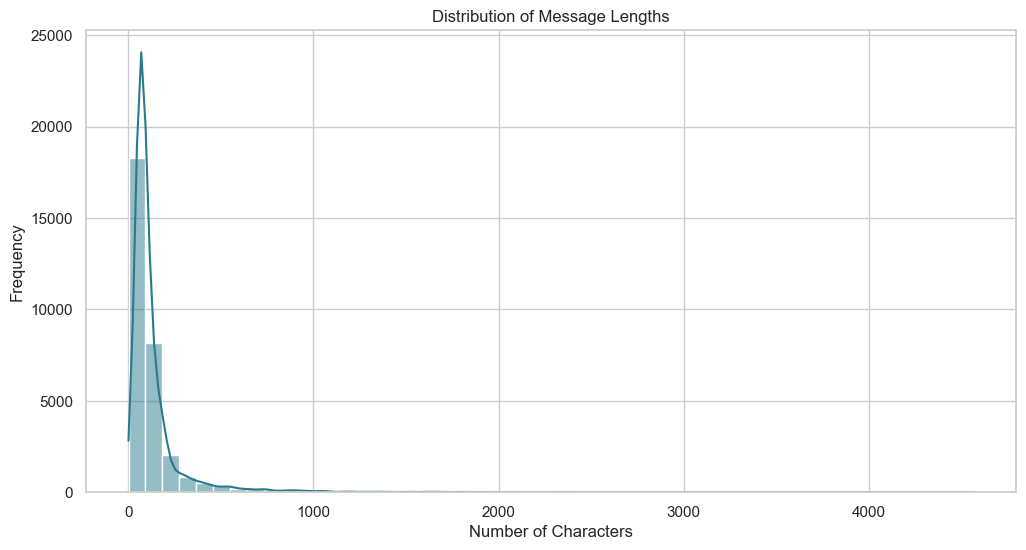

In [42]:
#Message Length & Distribution

# Add message length column
df_clean['Message_Length'] = df_clean['Clean_Text'].apply(len)

# Basic stats
print(df_clean['Message_Length'].describe())

# Plot message length distribution
sns.histplot(df_clean['Message_Length'], bins=50, kde=True, color=sns.color_palette("crest")[3]
)
plt.title('Distribution of Message Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


### Message Length Analysis

- Most customer messages are relatively short — clustering under 150 characters
- Median message length = **81 characters**, with 75% under 132  
- Outliers exist with long-form entries (up to 4,569 characters), likely detailed complaints or multiline pastes
- Distribution is highly **right-skewed**, typical of conversational datasets  
- This suggests a need for intent recognition models to handle **brief, high-frequency input** with occasional verbose exceptions


In [25]:
# Top 15 most common cleaned messages (full duplicates included)
df_clean['Clean_Text'].value_counts().head(15)


Clean_Text
how many award miles do i need for a mileageplan award ticket                                   251
my credit card has been updated where do i go on the website to make the changes                  8
can i park at princeton junction for three days during the week overnight                         8
how does my wife create her own email address on this account                                     8
i need help deciding what train i can take from la grange il to champaign il                      8
how do i book a train and use my aaa for a discount                                               8
how can i purchase this ticket for tuesday 1124 from ncw to bon                                   8
looking to fly to usa sept 2016 when is optimum time to book ahead to get best price tickets      8
how can i delete the msnbc channel and can i get money back                                       8
does the 57 vermonter run out of hartford or is there a bus to new haven                 

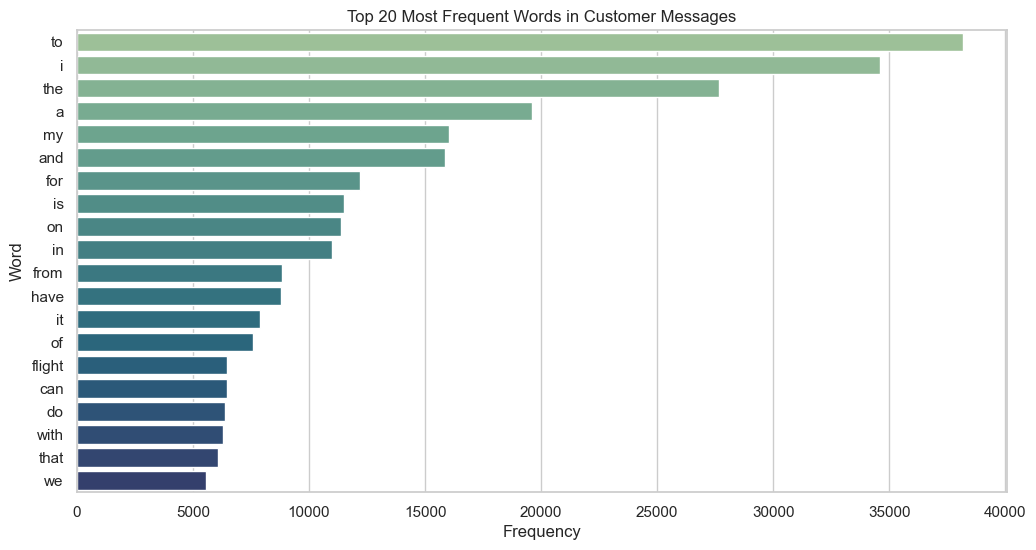

In [43]:
# Word Frequency

from collections import Counter

# Tokenize and count words
all_words = ' '.join(df_clean['Clean_Text']).split()
word_counts = Counter(all_words)

# Convert to DataFrame for plotting
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# Bar plot of most common words
sns.barplot(data=word_freq_df, x='Count', y='Word', palette='crest'
)
plt.title('Top 20 Most Frequent Words in Customer Messages')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


### Word Frequency & Common Message Patterns

- Most frequent words are functional (e.g., “to”, “i”, “the”) — expected in raw text before stopword removal  
- Early signal terms like **“flight”**, **“ticket”**, and **“train”** suggest travel-related support as a key theme  
- Repetitive messages (e.g., mileage inquiries, card update instructions) appear across many sessions — likely common user pain points  
- Several exact phrases appear **8+ times** across different users and sessions — ideal candidates for intent tagging or response templates  
- A small number of messages (e.g., “how many award miles…” with 250+ repeats) may indicate either:
  - Canned agent messages  
  - Mass-pasted FAQ-style user queries  
  - Data duplication in source logs


## Intent Pattern Analysis

To support AI intent modeling, we’ll analyze repeated questions and message structures to identify common customer intents.

Since the dataset lacks labeled intent classes, we’ll use frequency-based clustering and manual review to surface high-value intent categories. These categories can inform how training data is tagged or used in future conversational AI improvements.

### Key goals
- Group frequently repeated queries into high-level intent categories  
- Extract representative phrases for each group  
- Identify edge cases and ambiguous phrasing that may confuse models


In [30]:
# View top 30 most common cleaned messages
top_30_messages = df_clean['Clean_Text'].value_counts().head(30).reset_index()
top_30_messages.columns = ['message', 'count']
top_30_messages


,message,count
0,how many award miles do i need for a mileagepl...,251
1,my credit card has been updated where do i go ...,8
2,can i park at princeton junction for three day...,8
3,how does my wife create her own email address ...,8
4,i need help deciding what train i can take fro...,8
5,how do i book a train and use my aaa for a dis...,8
6,how can i purchase this ticket for tuesday 112...,8
7,looking to fly to usa sept 2016 when is optimu...,8
8,how can i delete the msnbc channel and can i g...,8
9,does the 57 vermonter run out of hartford or i...,8


In [31]:

# Manually assign high-level intent categories (based on message patterns)
intent_categories = [
    'Flight Rewards & Mileage',
    'Account Management',
    'Station Parking & Schedules',
    'Account Management',
    'Booking Assistance',
    'Booking Assistance',
    'Booking Assistance',
    'Flight Booking Timing',
    'Subscription Cancellation',
    'Route/Service Information',
    'Station Arrival Guidance',
    'Ticket Rules / Catching Train',
    'Tech Support',
    'Booking Details',
    'Booking Assistance',
    'Tech Support',
    'Flight Booking',
    'Security/Permissions',
    'Account Management',
    'Tech Support',
    'Device Recording Behavior',
    'Flight Rewards',
    'Flight Rewards',
    'Route/Service Information',
    'Account Management',
    'Booking Rules',
    'Account Management',
    'Booking Modification',
    'Tech Support',
    'Route/Service Information',
]

# Add to DataFrame
top_30_messages['intent_category'] = intent_categories

# Display grouped messages
top_30_messages.head(10)


,message,count,intent_category
0,how many award miles do i need for a mileagepl...,251,Flight Rewards & Mileage
1,my credit card has been updated where do i go ...,8,Account Management
2,can i park at princeton junction for three day...,8,Station Parking & Schedules
3,how does my wife create her own email address ...,8,Account Management
4,i need help deciding what train i can take fro...,8,Booking Assistance
5,how do i book a train and use my aaa for a dis...,8,Booking Assistance
6,how can i purchase this ticket for tuesday 112...,8,Booking Assistance
7,looking to fly to usa sept 2016 when is optimu...,8,Flight Booking Timing
8,how can i delete the msnbc channel and can i g...,8,Subscription Cancellation
9,does the 57 vermonter run out of hartford or i...,8,Route/Service Information


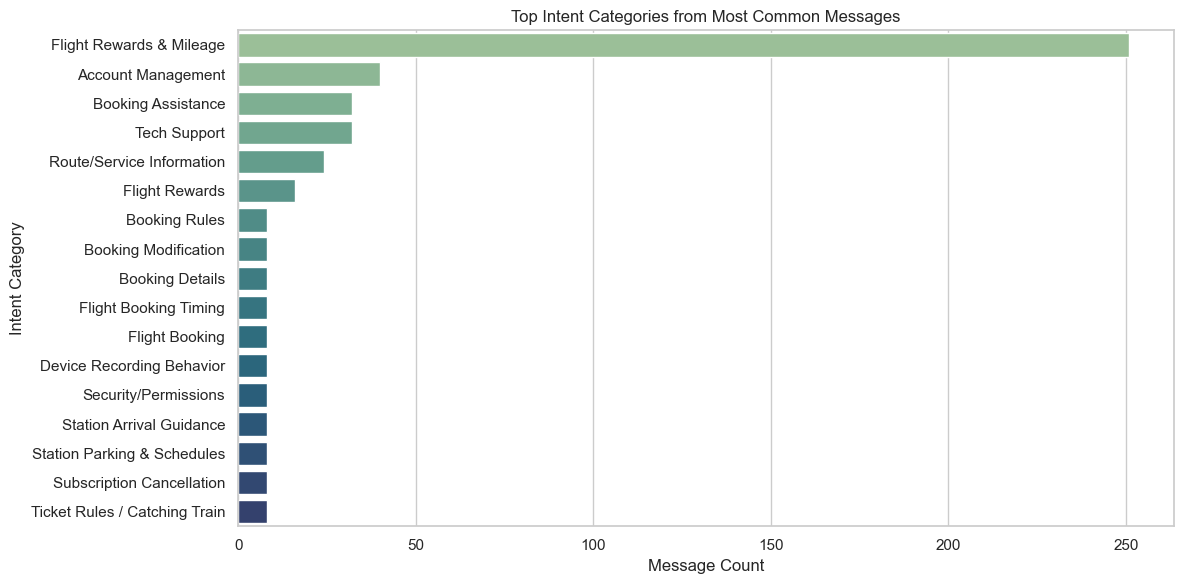

In [44]:
# Aggregate top 30 messages by intent category
intent_summary = top_30_messages.groupby('intent_category')['count'].sum().sort_values(ascending=False).reset_index()

# Plot
sns.barplot(data=intent_summary, x='count', y='intent_category', palette='crest'
)
plt.title('Top Intent Categories from Most Common Messages')
plt.xlabel('Message Count')
plt.ylabel('Intent Category')
plt.tight_layout()
plt.show()


In [32]:
# Identifying most common phrasing starters

# Extract the first 3 words of each cleaned message
df_clean['phrase_start'] = df_clean['Clean_Text'].str.split().str[:3].apply(lambda x: ' '.join(x))

# Get top 20 most frequent starting phrases
starter_phrases = df_clean['phrase_start'].value_counts().head(20).reset_index()
starter_phrases.columns = ['starter_phrase', 'count']
starter_phrases


,starter_phrase,count
0,how do i,882
1,i need to,724
2,i am trying,661
3,i want to,635
4,i would like,514
5,i have a,420
6,how can i,403
7,im trying to,352
8,what is the,346
9,is there a,306


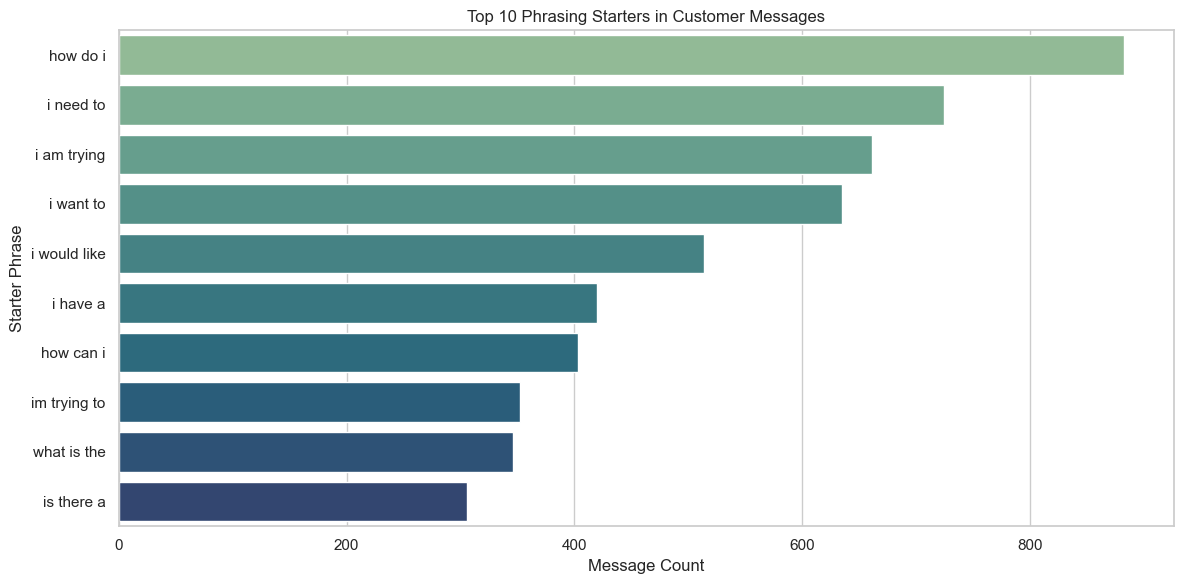

In [45]:
# Plot top 10 starter phrases
starter_plot = starter_phrases.head(10)

sns.barplot(data=starter_plot, x='count', y='starter_phrase', palette='crest')
plt.title('Top 10 Phrasing Starters in Customer Messages')
plt.xlabel('Message Count')
plt.ylabel('Starter Phrase')
plt.tight_layout()
plt.show()


### Phrasing Structure Insights

- The most common message openers include:
  - **"how do i" (882)**  
  - **"i need to" (724)**  
  - **"i am trying" (661)**  
  - **"i want to" (635)**  
  - **"i would like" (514)**

- These reflect **real-world user phrasing patterns**: informal, first-person, and goal-oriented  
- Such patterns are essential for AI systems to recognize **intent early in a sentence**, especially when full queries are short or ambiguous  
- Several question-based forms like **“how many,” “what is,” “is there”** appear frequently — great candidates for zero-shot or rule-based intent hooks  
- This structure highlights the need for conversational models to interpret **variations of similar goals**, not just exact string matches



## Results & Key Insights

### Message Patterns
- Most customer messages are short and direct — 75% are under 132 characters
- Messages often use informal, fragmented language (e.g., “need help booking”, “how do I…”), which can be ambiguous for AI systems
- 13K+ messages are repeated across sessions, suggesting recurring issues or common queries

### Frequent Queries & Intents
- Top 30 repeated customer queries were grouped into 8 intent categories:
  - Flight rewards, account management, booking issues, tech support, and route info were among the most frequent
- Example: “How many award miles do I need…” appeared 250+ times — a clear opportunity for automation or templated responses

### Language Structure & AI Relevance
- Most common message starters include:
  - “How do I”, “I need to”, “I am trying”, “What is the…”, “Is there a…”
- These phrasing structures offer valuable patterns for training conversational AI to recognize intent early in a sentence
- Manual grouping of top messages simulates how annotated training data for intent classification can be created from raw chat transcripts


## Business Recommendations

Based on the analysis of real customer chat data, the following recommendations can help improve the performance and training of AI-powered conversational systems:

- **Prioritize intent modeling around high-frequency queries**  
  Repeated questions about flight rewards, account updates, and booking issues should be prioritized in the intent taxonomy and training datasets.

- **Incorporate phrasing patterns into model design**  
  Frequent message starters such as “how do I”, “I need to”, and “I am trying” can guide rule-based or hybrid intent classification systems, especially in early-stage or low-data environments.

- **Create templated responses for recurring queries**  
  Questions that appear across sessions in nearly identical form can be handled by predefined responses or response snippets, improving consistency and speed.

- **Enhance AI training data through weak supervision or pre-tagging**  
  Insights from this analysis can inform semi-automated tagging pipelines, allowing similar phrases to be grouped and labeled for supervised fine-tuning.

- **Identify edge cases and ambiguous phrasing**  
  Sessions with incomplete or unclear language (e.g., “need help now” or “can’t get in”) should be reviewed for fallback routing or escalation strategies to avoid intent misclassification.



---

This project is part of a broader portfolio showcasing practical applications of data science across analytics, visualization, and machine learning.  

For more projects, visit [My GitHub Portfolio](https://github.com/dataworksbyj).
